<a href="https://colab.research.google.com/github/sordib/exercicios_bootcamp_womakerscode/blob/main/challenge_semana2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>











# **Desafio Probabilidade e Amostragem**

Integrantes Squad Grace Hopper:


*   Aline Alvino
*   Bianca Sordi
*   Maitê S. Cuevas
*   Marina Arthur
*   Marina Neves
*   Mayara Reghin
*   Victória Viana
*   Wellen Nascimento



## **Como nossa squad se organizou**


*  Nos reunimos para discutir sobre o desafio

*  Compartilhamos o colab para deixar livre para todas colaborarem com o desafio

*  Nos reunimos após o desafio estar pronto para conversar sobre o que fizemos, revisar e ajustar

* As integrantes Aline, Bianca, Maitê e Mayara ficaram responsáveis pela apresentação.

## **Desafios e facilidades**

Desafios

*   Aplicação de conceitos de probabilidade

Facilidades


*   Trabalho em conjunto pelo Colab
*   Houve uma melhora na nossa organização
*   Dados Fornecidos






________________________________________________________________________________
## **Importando bibliotecas e bases de dados**

In [ ]:
#Importando bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib._api.deprecation import math
from scipy.stats import norm


In [ ]:
#Importando bases de dados

consumidor = pd.read_csv("/content/desafio01consumidor-230829-103627.csv")
estoque = pd.read_csv("/content/desafio_02_estoque-230829-103603.csv")

________________________________________________________________________________
# **Desafio 1: Entendendo o consumidor**

Neste desafio iremos entender a *diferença de perfil do consumidor* de uma empresa de produtos de beleza *pré e pós-pandemia*.

Queremos saber se:

*   Houve mudança de fato?
*   Quais as diferenças do perfil do cliente novo para o antigo?

Nosso objetivo é descobrir como o time de marketing pode personalizar melhor os anúncios para o *novo perfil de consumidor*.

## **Conhecendo o dataset consumidor**

Exibir o dataset e verificar se há missing datas.
Exibir quantidade de linhas e colunas e tipos de dados das colunas.
Explorar variáveis.

In [ ]:
#Conhecendo as colunas do dataframe de Consumidor
consumidor.head()

,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
0,XXXXXXX72,30,7452,batom,Sudeste,1
1,XXXXXXX15,59,837,desodorante,Nordeste,1
2,XXXXXXX70,28,3231,sombra,Centro-Oeste,1
3,XXXXXXX99,27,5409,batom,Sul,1
4,XXXXXXX98,24,1142,batom,Sudeste,1


In [ ]:
#Entendendo a coluna (variável: pré-pandemia)
print("\nContagem de valores individuais: \n", consumidor['pre-pandemia'].value_counts())

print("\n \n Esta variável é booleana e indica se o cliente é de antes da pandemia (1=True) ou se ele é um cliente novo (0=False). ")



Contagem de valores individuais: 
 0    102
1    101
Name: pre-pandemia, dtype: int64

 
 Esta variável é booleana e indica se o cliente é de antes da pandemia (1=True) ou se ele é um cliente novo (0=False). 


In [ ]:
#Vemos a quantidade total de linhas e colunas
print("Quantidade de linhas e colunas, respectivamente:", consumidor.shape)

Quantidade de linhas e colunas, respectivamente: (203, 6)


In [ ]:
#Tipo dados armazenado em cada coluna
consumidor.dtypes

id_cliente      object
idade            int64
renda            int64
produto         object
regiao-BR       object
pre-pandemia     int64
dtype: object

In [ ]:
#separando o dataframe com os dados pré e pós pandemia
dados_pre_pandemia = consumidor.loc[(consumidor['pre-pandemia'] == 1)]
dados_pos_pandemia = consumidor.loc[(consumidor['pre-pandemia'] == 0)]

## **Entendendo a distribuição das variáveis**
Identificando a distribuição das variáveis(ex: idade, renda, região, produtos mais comprados antes e depois da pandemia), suas medidas de tendênia centrais e plotando histogramas e boxplots.

*  **Idade (quantitativa)**

Passo 1 - Especificando os limites de cada classe:

> Jovem ► Indivíduos de até 19 anos

> Adultos ► Indivíduos com idade entre 20 até 59 anos

> Idosos ► Indivíduos de 60 anos em diante

Passo 2 - Criar a tabela de frequências pré e pós-pandemia

In [ ]:
classes_idade = [0, 19, 59, 60] #classificando a idade dos clientes
labels_idade = ['Jovem','Adulto','Idoso']

In [ ]:
#analisando variável Idade Pré-pandemia
frequencia_idade_pre = pd.value_counts( #calculando a distribuição da frequencia das idades pre-pandemia
    pd.cut(x = dados_pre_pandemia.idade,
           bins = classes_idade,
           labels = labels_idade,
           include_lowest = True)
)
percentual_idade_pre = pd.value_counts( #calculando quanto isso representa em porcentual
    pd.cut(x = dados_pre_pandemia.idade,
           bins = classes_idade,
           labels = labels_idade,
           include_lowest = True),
    normalize = True
)
dist_freq_idade_pre = pd.DataFrame( # mostrando os resultados em forma de tabela
    {'Frequência': frequencia_idade_pre,'Porcentagem (%)': percentual_idade_pre}
)
dist_freq_idade_pre.rename_axis('Pré-pandemia', axis= 'columns', inplace = True)
dist_freq_idade_pre

Pré-pandemia,Frequência,Porcentagem (%)
Adulto,87,0.956044
Jovem,3,0.032967
Idoso,1,0.010989


In [ ]:
#analisando variável Idade Pós-pandemia
frequencia_idade_pos = pd.value_counts( #calculando a distribuição da frequencia das idades pre-pandemia
    pd.cut(x = dados_pos_pandemia.idade,
           bins = classes_idade,
           labels = labels_idade,
           include_lowest = True)
)
percentual_idade_pos = pd.value_counts( #calculando quanto isso representa em porcentual
    pd.cut(x = dados_pos_pandemia.idade,
           bins = classes_idade,
           labels = labels_idade,
           include_lowest = True),
    normalize = True
)
dist_freq_idade_pos = pd.DataFrame( #mostrando os resultados em forma de tabela
    {'Frequência': frequencia_idade_pos,'Porcentagem (%)': percentual_idade_pos}
)
dist_freq_idade_pos.rename_axis('Pós-pandemia', axis= 'columns', inplace = True)
dist_freq_idade_pos

Pós-pandemia,Frequência,Porcentagem (%)
Adulto,84,0.954545
Jovem,3,0.034091
Idoso,1,0.011364


Text(0, 0.5, 'Quantidade de Clientes')

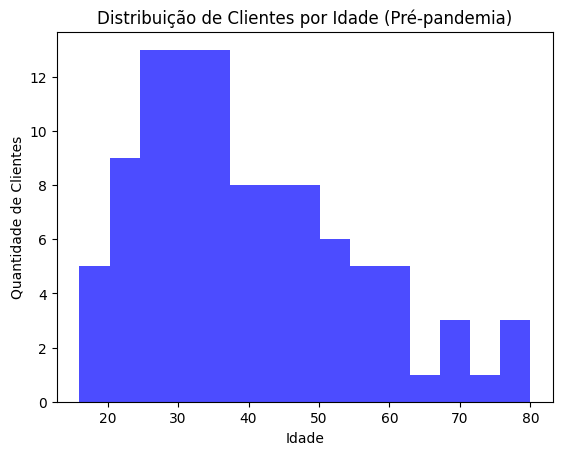

In [ ]:
#plotando histograma pré-pandemia
plt.hist(dados_pre_pandemia['idade'], bins=15, color='blue', alpha=0.7)
#Configurando o título do gráfico
plt.title('Distribuição de Clientes por Idade (Pré-pandemia)')
#Configurando o rótulo do eixo x
plt.xlabel('Idade')
#Configurando o rótulo do eixo y
plt.ylabel('Quantidade de Clientes')


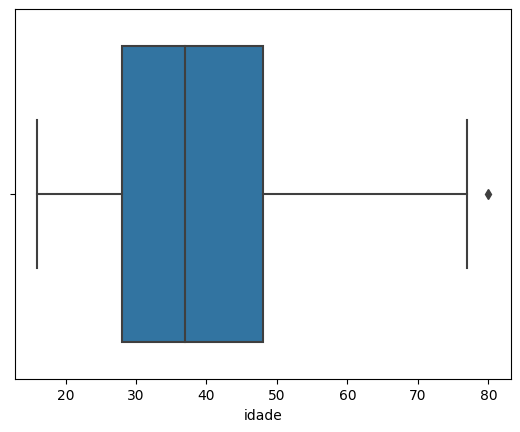

In [ ]:
#Plotando boxplot Pré-pandemia
ax = sns.boxplot(data=dados_pre_pandemia, x='idade')

Text(0, 0.5, 'Quantidade de Clientes')

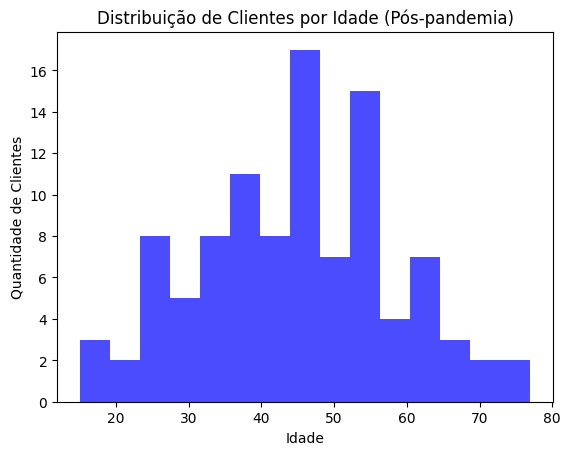

In [ ]:
#plotando histograma pós-pandemia
plt.hist(dados_pos_pandemia['idade'], bins=15, color='blue', alpha=0.7)
#Configurando o título do gráfico
plt.title('Distribuição de Clientes por Idade (Pós-pandemia)')
#Configurando o rótulo do eixo x
plt.xlabel('Idade')
#Configurando o rótulo do eixo y
plt.ylabel('Quantidade de Clientes')

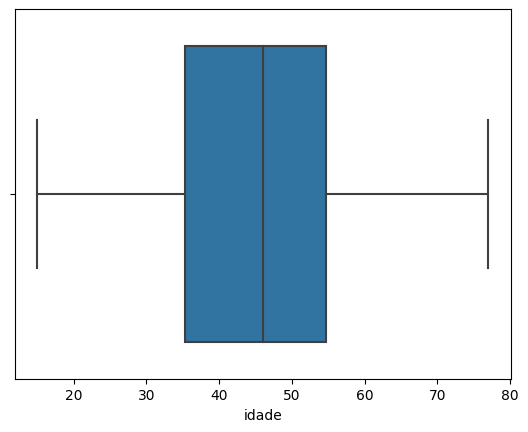

In [ ]:
#Plotando boxplot Pós-pandemia
ax = sns.boxplot(data=dados_pos_pandemia, x='idade')

In [ ]:
#calculando medidas centrais da Idade
idade_media_pre = dados_pre_pandemia['idade'].mean()
idade_media_pos = dados_pos_pandemia['idade'].mean()
idade_mediana_pre = dados_pre_pandemia['idade'].median()
idade_mediana_pos = dados_pos_pandemia['idade'].median()
idade_moda_pre = dados_pre_pandemia['idade'].mode()
idade_moda_pos = dados_pos_pandemia['idade'].mode()




In [ ]:
#Verificando a distribuição da variável Idade:
print('A variável Idade pré-pandemia possui:\nmédia =', idade_media_pre,
      '\nmediana =', idade_mediana_pre,
      '\nmoda =', idade_moda_pre)

print('\nA variável Idade pós-pandemia possui:\nmédia =', idade_media_pos,
      '\nmediana =', idade_mediana_pos,
      '\nmoda =', idade_moda_pos)

A variável Idade pré-pandemia possui:
média = 39.881188118811885 
mediana = 37.0 
moda = 0    26
1    37
Name: idade, dtype: int64

A variável Idade pós-pandemia possui:
média = 44.90196078431372 
mediana = 46.0 
moda = 0    56
Name: idade, dtype: int64


Comentários sobre a análise da variável Idade:


*   Pré-pandemia: o histograma, boxplot e a análise das variáveis centrais permitem verificar que a variável antes da pandemia possuía uma distribuição com assimetria à direita (com moda>mediana>média)
*    Pós-pandemia: o histograma, boxplot e a análise das variáveis centrais permitem verificar que a variável depois da pandemia possui uma distribuição próxima da simétrica (com média, mediana e moda aproximadamente iguais)
*   Apesar da classe predominante ser "Adulto" no pré e no pós pandemia, houve um aumento na idade média no pós pandemia. Se antes a média de idade do público era por volta dos 39 anos, após a pandemia passou a ser 44 anos.




*   **Renda**

Utilizar a seguinte classificação:

> <b>A</b> ► Acima de 20 SM

> <b>B</b> ► De 10 a 20 SM

> <b>C</b> ► De 4 a 10 SM

> <b>D</b> ► De 2 a 4 SM

> <b>E</b> ► Até 2 SM

onde <b>SM</b> é o valor do salário mínimo na época. Em nosso caso <b>R$ 788,00</b> (2015):

> <b>A</b> ► Acima de 15.760

> <b>B</b> ► De 7.880 a 15.760

> <b>C</b> ► De 3.152 a 7.880

> <b>D</b> ► De 1.576 a 3.152

> <b>E</b> ► Até 1.576

In [ ]:
#distribuindo as classes de renda
classes_renda = [0, 1576, 3152, 7880, 15760, 200000]
labels_renda = ['E','D','C','B','A']

In [ ]:
#analisando variável Renda Pré-pandemia
frequencia_renda_pre = pd.value_counts( #calculando a distribuição da frequencia das idades
    pd.cut(x = dados_pre_pandemia.renda,
           bins = classes_renda,
           labels = labels_renda,
           include_lowest = True)
)
percentual_renda_pre = pd.value_counts( #calculando quanto isso representa em porcentual
    pd.cut(x = dados_pre_pandemia.renda,
           bins = classes_renda,
           labels = labels_renda,
           include_lowest = True),
    normalize = True
)
dist_freq_renda_pre = pd.DataFrame( # mostrando os resultados em forma de tabela
    {'Frequência': frequencia_renda_pre,'Porcentagem (%)': percentual_renda_pre}
)
dist_freq_renda_pre.rename_axis('Pré-pandemia', axis= 'columns', inplace = True)
dist_freq_renda_pre.sort_index(ascending = False)

Pré-pandemia,Frequência,Porcentagem (%)
A,16,0.158416
B,33,0.326733
C,36,0.356436
D,9,0.089109
E,7,0.069307


In [ ]:
#analisando variável Renda Pós-pandemia
frequencia_renda_pos = pd.value_counts( #calculando a distribuição da frequencia das idades
    pd.cut(x = dados_pos_pandemia.renda,
           bins = classes_renda,
           labels = labels_renda,
           include_lowest = True)
)
percentual_renda_pos = pd.value_counts( #calculando quanto isso representa em porcentual
    pd.cut(x = dados_pos_pandemia.renda,
           bins = classes_renda,
           labels = labels_renda,
           include_lowest = True),
    normalize = True
)
dist_freq_renda_pos = pd.DataFrame( # mostrando os resultados em forma de tabela
    {'Frequência': frequencia_renda_pos,'Porcentagem (%)': percentual_renda_pos}
)
dist_freq_renda_pos.rename_axis('Pós-pandemia', axis= 'columns', inplace = True)
dist_freq_renda_pos.sort_index(ascending = False)

Pós-pandemia,Frequência,Porcentagem (%)
A,33,0.323529
B,58,0.568627
C,10,0.098039
D,1,0.009804
E,0,0.000000


Text(0, 0.5, 'Quantidade de Clientes')

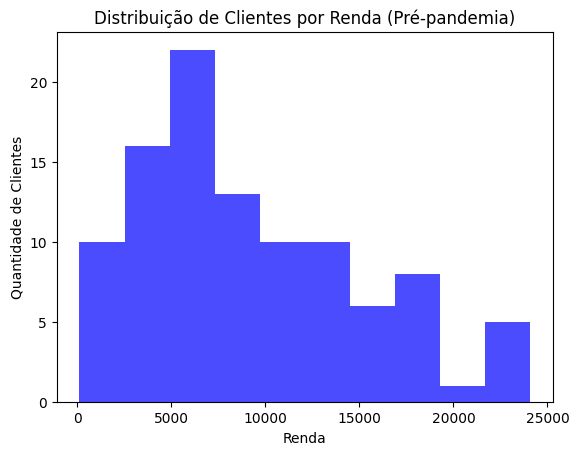

In [ ]:
#plotando histograma para a variável Renda pré-pandemia
plt.hist(dados_pre_pandemia['renda'], bins=10, color='blue', alpha=0.7)
#Configurando o título do gráfico
plt.title('Distribuição de Clientes por Renda (Pré-pandemia)')
#Configurando o rótulo do eixo x
plt.xlabel('Renda')
#Configurando o rótulo do eixo y
plt.ylabel('Quantidade de Clientes')

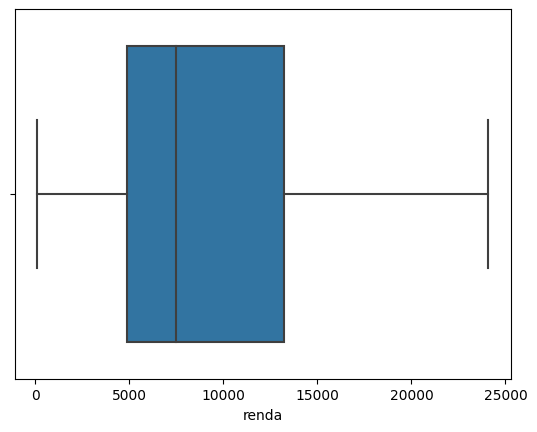

In [ ]:
#plotando boxplot da variável Renda Pré-pandemia
ax = sns.boxplot(data=dados_pre_pandemia, x='renda')

Text(0, 0.5, 'Quantidade de Clientes')

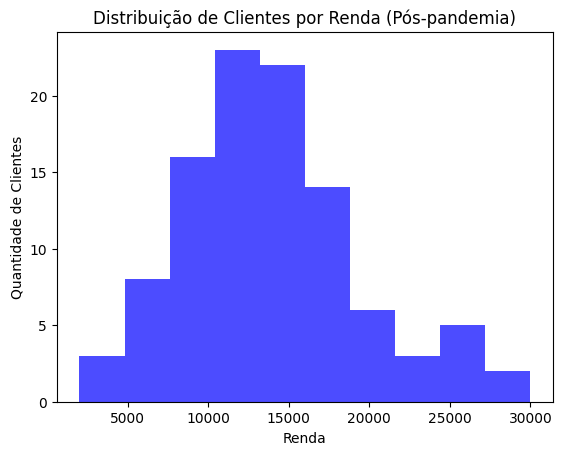

In [ ]:
#plotando histograma para a variável Renda pós-pandemia
plt.hist(dados_pos_pandemia['renda'], bins=10, color='blue', alpha=0.7)
#Configurando o título do gráfico
plt.title('Distribuição de Clientes por Renda (Pós-pandemia)')
#Configurando o rótulo do eixo x
plt.xlabel('Renda')
#Configurando o rótulo do eixo y
plt.ylabel('Quantidade de Clientes')

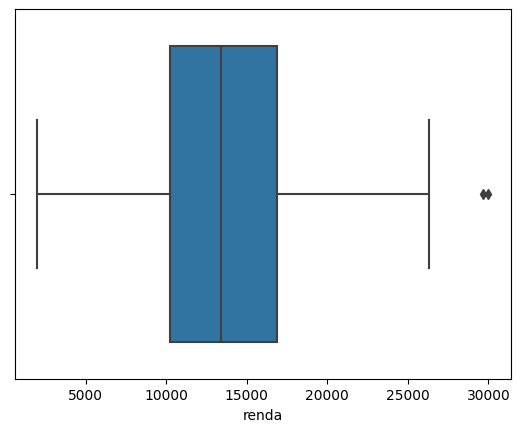

In [ ]:
#plotando boxplot da variável Renda Pós-pandemia
ax = sns.boxplot(data=dados_pos_pandemia, x='renda')

In [ ]:
#calculando medidas centrais da Renda
renda_media_pre = dados_pre_pandemia['renda'].mean()
renda_media_pos = dados_pos_pandemia['renda'].mean()
renda_mediana_pre = dados_pre_pandemia['renda'].median()
renda_mediana_pos = dados_pos_pandemia['renda'].median()
renda_moda_pre = dados_pre_pandemia['renda'].mode()
renda_moda_pos = dados_pos_pandemia['renda'].mode()

In [ ]:
#Verificando a distribuição da variável Renda:
print('A variável Renda pré-pandemia possui:\nmédia =', renda_media_pre,
      '\nmediana =', renda_mediana_pre)
print('A variável Renda pós-pandemia possui:\nmédia =', renda_media_pos,
      '\nmediana =', renda_mediana_pos)

A variável Renda pré-pandemia possui:
média = 9180.643564356436 
mediana = 7488.0
A variável Renda pós-pandemia possui:
média = 13968.5 
mediana = 13380.5


Comentários sobre a análise da variável Renda:


*   Pré-pandemia: o histograma, boxplot e a análise das variáveis centrais permitem verificar que a variável antes da pandemia possuía uma distribuição com assimetria à direita (com moda>mediana>média)
*    Pós-pandemia: o histograma, boxplot e a análise das variáveis centrais permitem verificar que a variável depois da pandemia possui uma distribuição próxima da simétrica (com média, mediana e moda aproximadamente iguais)
*   A análise indica um aumento na renda média dos clientes pós pandemia em comparação com o pré pandemia




* **Região**

In [ ]:
#análise da região pré-pandemia
dados_pre_pandemia['regiao-BR'].value_counts()

Sul             29
Nordeste        26
Sudeste         21
Centro-Oeste    17
Norte            8
Name: regiao-BR, dtype: int64

In [ ]:
#análise da região pos-pandemia
dados_pos_pandemia['regiao-BR'].value_counts()

Sul             42
Nordeste        25
Sudeste         18
Norte            9
Centro-Oeste     8
Name: regiao-BR, dtype: int64

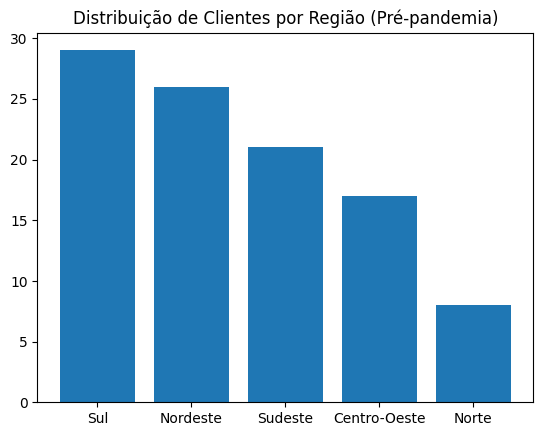

In [ ]:
# Criar um DataFrame com as vendas por região pré-pandemia
data_regiao_pre = {'Categorias': ['Sul', 'Nordeste', 'Sudeste', 'Centro-Oeste','Norte'],
        'Valores': [29, 26, 21, 17, 8]}
df_regiao_pre = pd.DataFrame(data_regiao_pre)

# Criar um gráfico de barras
plt.bar(df_regiao_pre['Categorias'], df_regiao_pre['Valores'])

# Adicionar rótulos e título
plt.title('Distribuição de Clientes por Região (Pré-pandemia)')

# Exibir o gráfico
plt.show()


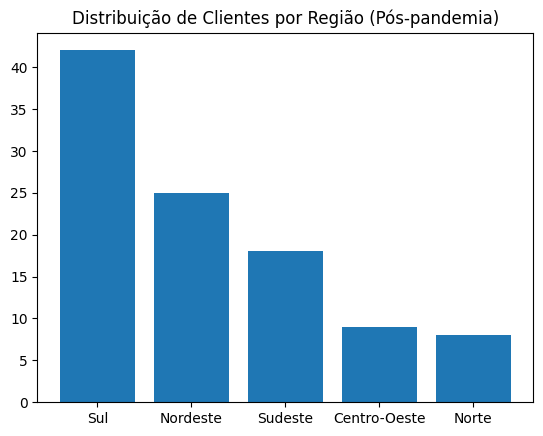

In [ ]:
# Criar um DataFrame com as vendas por região pré-pandemia
data_regiao_pos = {'Categorias': ['Sul', 'Nordeste', 'Sudeste', 'Centro-Oeste','Norte'],
        'Valores': [42, 25, 18, 9, 8]}
df_regiao_pos = pd.DataFrame(data_regiao_pos)

# Criar um gráfico de barras
plt.bar(df_regiao_pos['Categorias'], df_regiao_pos['Valores'])

# Adicionar rótulos e título
plt.title('Distribuição de Clientes por Região (Pós-pandemia)')

# Exibir o gráfico
plt.show()

Comentários sobre a análise da variável Região:


*  É possível verificar que a tendência de vendas com relação à região se manteve antes e após a pandemia Sul>Nordeste>Sudeste>Centro-oeste, porém houve um aumento nas vendas do Sul




*   **Produtos mais comprados antes e depois da pandemia**

In [ ]:
#análise dos produtos vendidos pré-pandemia
dados_pre_pandemia['produto'].value_counts()

batom          61
desodorante    20
antissinais     9
sombra          4
perfume         4
base            3
Name: produto, dtype: int64

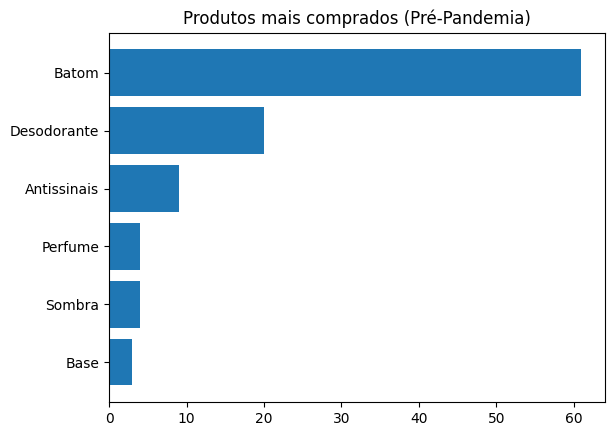

In [ ]:
# Criar um DataFrame de exemplo
data_regiao_pre = {'Categorias': ['Batom', 'Desodorante', 'Antissinais', 'Sombra','Perfume','Base'],
        'Valores': [61, 20, 9, 4, 4, 3]}
df_regiao_pre = pd.DataFrame(data_regiao_pre).sort_values(by='Valores', ascending=True)

# Criar um gráfico de barras
plt.barh(df_regiao_pre['Categorias'], df_regiao_pre['Valores'])

# Adicionar rótulos e título
plt.title('Produtos mais comprados (Pré-Pandemia)')

# Exibir o gráfico
plt.show()

In [ ]:
dados_pos_pandemia['produto'].value_counts()

desodorante    46
antissinais    20
batom          15
sombra          9
perfume         8
base            4
Name: produto, dtype: int64

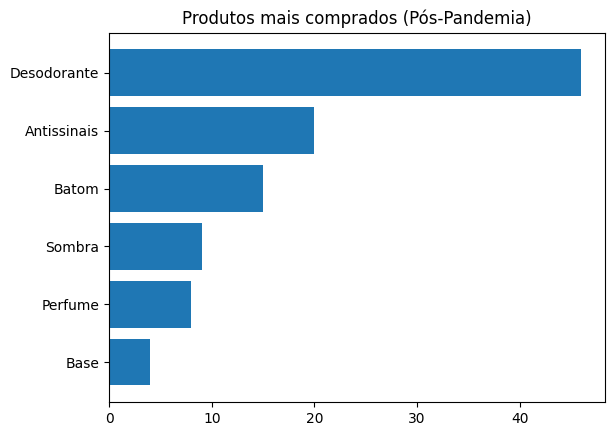

In [ ]:
# Criar um DataFrame de exemplo
data_regiao_pos = {'Categorias': ['Batom', 'Desodorante', 'Antissinais', 'Sombra','Perfume','Base'],
        'Valores': [15, 46, 20, 9, 8, 4]}
df_regiao_pos = pd.DataFrame(data_regiao_pos).sort_values(by='Valores', ascending=True)

# Criar um gráfico de barras
plt.barh(df_regiao_pos['Categorias'], df_regiao_pos['Valores'])

# Adicionar rótulos e título
plt.title('Produtos mais comprados (Pós-Pandemia)')

# Exibir o gráfico
plt.show()

É possível verificar que a tendência de produtos mais vendidos antes e após a pandemia modificou-se, sendo que antes da pandemia os produtos mais vendidos eram: batom>desodorante>antissinais>perfume>sombra>base, enquanto pós pandemia os produtos mais vendidos foram: desodorante>antissinais>batom>sombra>perfume>base

* Com o aumento da média de idade veio o aumento da procura por antissinais.

## **Explorando estatisticamente as diferenças pré e pós pandemia**

Há diferenças nítidas antes e depois da pandemia?
Como provamos essas diferenças estatisticamente?

Sim, há diferenças nítidas antes e depois da pandemia e para provarmos se essas diferenças são estatisticamente significativas realizaremos um teste estatístico (Teste de Hipóteses).


### **Teste de hipóteses entre duas amostras para validar se os clientes pós pandemia tendem a ter uma idade média maior do que no pré pandemia**

In [ ]:
#Teste de hipótese entre duas amostras de Idade

#Separando as amostras
idade_pre_pandemia =  dados_pre_pandemia['idade']
idade_pos_pandemia = dados_pos_pandemia['idade']

#Calculando o número de elementos por amostra
n_pre_pandemia = len(idade_pre_pandemia)
n_pos_pandemia = len(idade_pos_pandemia)

#Calculando desvio padrão amostral
desvio_padrao_pre = idade_pre_pandemia.std()
desvio_padrao_pos = idade_pos_pandemia.std()

print("A amostra idade pré pandemia possui", n_pre_pandemia," elementos, com uma média de", idade_media_pre, "e devio padrão de " , desvio_padrao_pre)
print("A amostra idade pós pandemia possui", n_pos_pandemia," elementos, uma média de", idade_media_pos, "e devio padrão de " , desvio_padrao_pos)


A amostra idade pré pandemia possui 101  elementos, com uma média de 39.881188118811885 e devio padrão de  15.016182689826913
A amostra idade pós pandemia possui 102  elementos, uma média de 44.90196078431372 e devio padrão de  13.37317383030209




**Formulando nossas hipóteses:**

$H_0$: Idade Média Pós Pandemia <= Idade Média Pré Pandemia

$H_1$: Idade Média Pós Pandemia > Idade Média Pré Pandemia


In [ ]:
#Fixação da significância do teste (Significância de 5% e Confiança de 95%)

significancia = 0.05
confianca = 1 - significancia

#Cálculo do z_alpha

z_alpha = norm.ppf(confianca)
z_alpha.round(2)
print("O valor de Z_alpha é ", z_alpha)

#Cálculo da estátistica-teste

d_o = 0

numerador = (idade_media_pos - idade_media_pre) - d_o

denominador = np.sqrt((desvio_padrao_pos ** 2 / n_pos_pandemia) + (desvio_padrao_pre ** 2 / n_pre_pandemia))

z = numerador / denominador

print('O valor de Z é ', z)

#Aceitação ou rejeição da hipótese
#Rejeitamos se z>= z_alpha for igual a True

print(z >= z_alpha/2)

O valor de Z_alpha é  1.6448536269514722
O valor de Z é  2.5148280237546734
True


Com o teste, rejeitamos a hipótese de que a idade média pós pandemia é menor ou igual a idade média pós pandemia, assim provando que houve um aumento na idade média dos clientes.


### **Teste de hipóteses entre duas amostras para validar se os clientes no pós pandemia possui uma renda média maior do que no pré pandemia**

In [ ]:
#Teste de hipótese entre duas amostras de Renda

#Separando as amostras
renda_pre_pandemia =  dados_pre_pandemia['renda']
renda_pos_pandemia = dados_pos_pandemia['renda']

#Calculando o número de elementos por amostra
n_pre_pandemia = len(renda_pre_pandemia)
n_pos_pandemia = len(renda_pos_pandemia)

#Calculando desvio padrão amostral
desvio_padrao_pre = renda_pre_pandemia.std()
desvio_padrao_pos = renda_pos_pandemia.std()

print("A amostra renda pré pandemia possui", n_pre_pandemia," elementos, com uma média de", renda_media_pre, "e devio padrão de " , desvio_padrao_pre)
print("A amostra renda pós pandemia possui", n_pos_pandemia," elementos, uma média de", renda_media_pos, "e devio padrão de " , desvio_padrao_pos)


A amostra renda pré pandemia possui 101  elementos, com uma média de 9180.643564356436 e devio padrão de  6007.677720357773
A amostra renda pós pandemia possui 102  elementos, uma média de 13968.5 e devio padrão de  5641.38444448657


**Formulando nossas hipóteses:**


$H_0$: Renda Média Pós Pandemia <= Renda Média Pré Pandemia

$H_1$: Renda Média Pós Pandemia > Renda Média Pré Pandemia

In [ ]:
#Fixação da significância do teste (Significância de 5% e Confiança de 95%)

significancia = 0.05
confianca = 1 - significancia

#Cálculo do z_alpha

z_alpha = norm.ppf(confianca)
z_alpha.round(2)
print("O valor de Z_alpha é ", z_alpha)

#Cálculo da estátistica-teste

d_o = 0

numerador = (renda_media_pos - renda_media_pre) - d_o

denominador = np.sqrt((desvio_padrao_pos ** 2 / n_pos_pandemia) + (desvio_padrao_pre ** 2 / n_pre_pandemia))

z = numerador / denominador

print('O valor de Z é ', z)

#Aceitação ou rejeição da hipótese
#Rejeitamos se z>= z_alpha for igual a True

print(z >= z_alpha/2)

O valor de Z_alpha é  1.6448536269514722
O valor de Z é  5.852091652560244
True


Com o teste, rejeitamos a hipótese de que a renda média pós pandemia é menor ou igual a renda média pós pandemia, assim provando que a renda média pós pandemia é maior que a renda média dos clientes pré pandemia

## **Calculando amostras**

Suponha que a sua "população" de clientes verdadeira é de 100000. Qual o tamanho da amostra necessária para chegarmos a conclusões com 95% de confiança e 2% de margem de erro? A base informada é suficiente? E com uma margem de erro de 10%?

In [ ]:
#variáveis para cálculo do tamanho da amostra considerando a variável Renda
#considerando 95 % de confiança e erro de 2 %
z = norm.ppf(0.5+(0.95/2))
z
media_renda = consumidor['renda'].mean()
desvio_renda = consumidor['renda'].std()
erro = 0.02 * media_renda
N = 100000
n = ((z**2)*(desvio_renda**2)*(N))/(((z**2)*(desvio_renda**2))+((erro**2)*(N-1)))
print('O tamanho da amostra calculado é: ',int(round(n)))


O tamanho da amostra calculado é:  2751


**Conclusão:**
Como o valor obtido para o tamanho da amostra foi de 2751, é possível verificar que o tamanho da nossa base (203) é insuficiente para atender as específicações (margem de erro = 2%).

In [ ]:
#variáveis para cálculo do tamanho da amostra considerando a variável Renda
#considerando 95 % de confiança e erro de 10 %
z = norm.ppf(0.5+(0.95/2))
z
media_renda = consumidor['renda'].mean()
desvio_renda = consumidor['renda'].std()
erro = 0.10 * media_renda
N = 100000
n = ((z**2)*(desvio_renda**2)*(N))/(((z**2)*(desvio_renda**2))+((erro**2)*(N-1)))
print('O tamanho da amostra calculado é: ',int(round(n)))

O tamanho da amostra calculado é:  113


**Conclusão:**
Como o valor obtido para o tamanho da amostra foi de 113, é possível verificar que o tamanho da base (203) é suficiente para atender as especificações (margem de erro = 10%).

In [ ]:
#variáveis para cálculo do tamanho da amostra considerando a variável Idade
#considerando 95 % de confiança e erro de 2 %
z = norm.ppf(0.5+(0.95/2))
z
media_idade = consumidor['idade'].mean()
desvio_idade = consumidor['idade'].std()
erro = 0.02 * media_idade
N = 100000
n = ((z**2)*(desvio_idade**2)*(N))/(((z**2)*(desvio_idade**2))+((erro**2)*(N-1)))
print('O tamanho da amostra calculado é: ',int(round(n)))

O tamanho da amostra calculado é:  1095


**Conclusão:**
Como o valor obtido para o tamanho da amostra foi de 1095, é possível verificar que o tamanho da base (203) é insuficiente para atender as especificações (margem de erro = 2%).

In [ ]:
#variáveis para cálculo do tamanho da amostra considerando a variável Idade
#considerando 95 % de confiança e erro de 10 %
z = norm.ppf(0.5+(0.95/2))
z
media_idade = consumidor['idade'].mean()
desvio_idade = consumidor['idade'].std()
erro = 0.10 * media_idade
N = 100000
n = ((z**2)*(desvio_idade**2)*(N))/(((z**2)*(desvio_idade**2))+((erro**2)*(N-1)))
print('O tamanho da amostra calculado é: ',int(round(n)))

O tamanho da amostra calculado é:  44


**Conclusão:**
Como o valor obtido para o tamanho da amostra foi de 44, é possível verificar que o tamanho da base (203) é suficiente para atender as especificações (margem de erro = 10%).

## **Sugestões para a equipe de marketing**




*  Supondo que temos uma população de 100 mil clientes, como apontado anteriormente, para podermos analisar os dados com uma margem de erros menor precisariamos de uma amostra maior.

*   Houve uma mudança no perfil dos clientes no pós pandemia, principalmente em relação à idade e à renda. A única tendência que se manteve foi a distribuição dos clientes em relação à região do Brasil em que residem.

*   A idade média dos clientes no pós pandemia é comprovadamente maior, portanto o ideal seria preparar as campanhas para um público alvo mais velho (sugestão: entre 35 e 50 anos) ou preparar campanhas pensando em atrair novamente o público mais jovem, dependendo da estratégia que a empresa pretende adotar com base nos dados.

*   A renda média dos clientes também está estatisticamente provada como sendo maior no pós pandemia, o que aumenta o poder aquisitivo dos clientes e pode ser um bom ponto para explorar na estratégia de marketing da empresa.

*   Houve uma mudança nos itens mais vendidos e consequentemente surge a necessidade de avaliar quais produtos devem ter maior destaque nas próximas campanhas, além de entender o motivo da venda dos demais produtos ter caído para traçar estratégias. A tabela de vendas de produto por região abaixo poderia ajudar a dar traçar estratégias de venda por região, observando os produtos mais vendidos no pré e pós pandemia, já que há visivelmente uma diferença significativa entre os produtos vendidos por região.








In [ ]:
# montando tabela crosstab da região e dos produtos vendidos pré-pandemia
frequencia_pre_pandemia = pd.crosstab(dados_pre_pandemia['regiao-BR'],
                         dados_pre_pandemia['produto'])
frequencia_pre_pandemia

produto,antissinais,base,batom,desodorante,perfume,sombra
regiao-BR,,,,,,
Centro-Oeste,1,3,0,5,4,4
Nordeste,0,0,11,15,0,0
Norte,8,0,0,0,0,0
Sudeste,0,0,21,0,0,0
Sul,0,0,29,0,0,0


In [ ]:
# montando tabela crosstab da região e dos produtos vendidos pós-pandemia
frequencia_pos_pandemia = pd.crosstab(dados_pos_pandemia['regiao-BR'],
                         dados_pos_pandemia['produto'])
frequencia_pos_pandemia

produto,antissinais,base,batom,desodorante,perfume,sombra
regiao-BR,,,,,,
Centro-Oeste,8,0,0,0,0,0
Nordeste,3,4,0,1,8,9
Norte,9,0,0,0,0,0
Sudeste,0,0,14,4,0,0
Sul,0,0,1,41,0,0


________________________________________________________________________________
# **Desafio 2: Determinando o estoque de segurança**

Neste desafio, estamos lidando com uma empresa de produtos perecíveis que necessita de uma política de estoque eficiente. É necessário ter um estoque de segurança acima da previsão de vendas, porém de forma que não gere um custo excessivo e "desova" (jogar o produto fora por não ser vendido).

Iremos calcular o estoque de segurança ideal para o gerente de vendas.

Obs: Necessário ler e entender os conceitos apresentados na instrução.

## **Conhecendo o dataset estoque**

In [ ]:
#Conhecendo as colunas
estoque.head()

,data,vendas-iogurte,lead-time
0,2015-01-04,5083,4
1,2015-01-11,4936,3
2,2015-01-18,5051,6
3,2015-01-25,4846,4
4,2015-02-01,5003,5


In [ ]:
print("Quantidade de linhas e colunas, respectivamente:", estoque.shape)

Quantidade de linhas e colunas, respectivamente: (370, 3)


In [ ]:
#Conhecendo os dados das colunas
estoque.dtypes

data              object
vendas-iogurte     int64
lead-time          int64
dtype: object

## **Analisando dados das vendas e do lead time**

Os dados seguem uma distribuição normal? Quais características indicam isso?

In [ ]:
#Calculando medidas de tendência central das vendas
media_vendas = estoque['vendas-iogurte'].mean()
mediana_vendas = estoque['vendas-iogurte'].median()
moda_vendas = estoque['vendas-iogurte'].mode()

print('Média de vendas de iogurte: ', media_vendas)
print('Mediana das vendas de iogurte: ', mediana_vendas)
print('Moda das vendas de iogurte: ', moda_vendas)

print("\nUma das características da distribuição normal são as medidas de tendência central apresentarem o mesmo valor, portanto temos com esses resultados de medidas de tendência central próxima uma indicação de que os dados estão próximos de uma distribuição é normal.")

Média de vendas de iogurte:  4999.1702702702705
Mediana das vendas de iogurte:  4996.0
Moda das vendas de iogurte:  0    5020
Name: vendas-iogurte, dtype: int64

Uma das características da distribuição normal são as medidas de tendência central apresentarem o mesmo valor, portanto temos com esses resultados de medidas de tendência central próxima uma indicação de que os dados estão próximos de uma distribuição é normal.


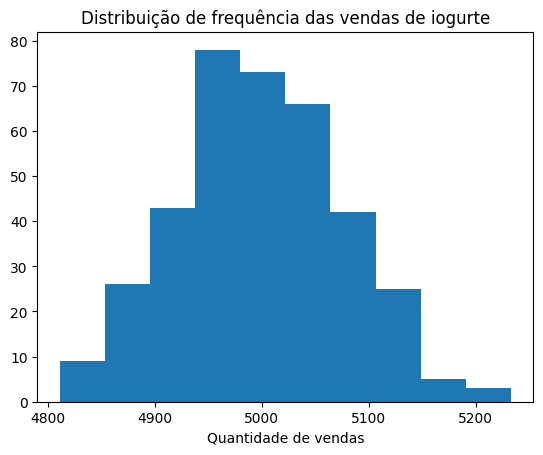

In [ ]:
#Plotando o histograma das vendas de iogurte para verificar a distribuição de tendências

plt.hist(estoque['vendas-iogurte'])

plt.title('Distribuição de frequência das vendas de iogurte')

plt.xlabel('Quantidade de vendas')

plt.show()

In [ ]:
#Calculando medidas de tendência central do lead time
media_lead_time= estoque['lead-time'].mean()
mediana__lead_time = estoque['lead-time'].median()
moda_lead_time = estoque['lead-time'].mode()

print('Média do lead time das vendas de iogurte: ', media_lead_time.round())
print('Mediana do lead time vendas de iogurte: ', mediana__lead_time)
print('Moda do lead time das vendas de iogurte: ', moda_lead_time)

print("\nAo verificar os valores das medidas de tendência central do lead time, arredondado a média, verificamos que os três valores são iguais, indicando que se trata de uma distribuição normal")

Média do lead time das vendas de iogurte:  5.0
Mediana do lead time vendas de iogurte:  5.0
Moda do lead time das vendas de iogurte:  0    5
Name: lead-time, dtype: int64

Ao verificar os valores das medidas de tendência central do lead time, arredondado a média, verificamos que os três valores são iguais, indicando que se trata de uma distribuição normal


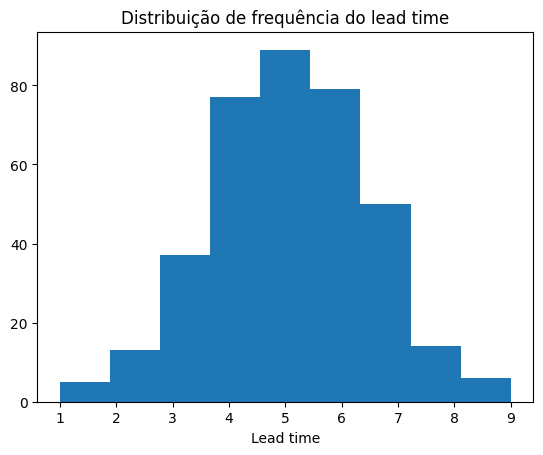

In [ ]:
#Plotando o histograma do lead time para verificar a distribuição de tendências

plt.hist(estoque['lead-time'], bins=9)

plt.title('Distribuição de frequência do lead time')

plt.xlabel('Lead time')

plt.show()

In [ ]:
#Conclusão
print("Para analisar a existência de uma distribuição normal, tomamos como base as seguintes características: \n a) Medidas de tendência central iguais \n b) Simetria em torno da média no histograma \n\nA quantidade de vendas possui medidas de tendência central ligeiramente diferentes e não possui simetria em torno da média. \nO lead time das vendas possui medidas de tendência central iguais(considerando a média arredondada), porém seu histograma não possui simetria ao redor da média.\nDesta forma, os dados se aproximam, mas não possuem uma distribuição perfeitamente normal.")

Para analisar a existência de uma distribuição normal, tomamos como base as seguintes características: 
 a) Medidas de tendência central iguais 
 b) Simetria em torno da média no histograma 

A quantidade de vendas possui medidas de tendência central ligeiramente diferentes e não possui simetria em torno da média. 
O lead time das vendas possui medidas de tendência central iguais(considerando a média arredondada), porém seu histograma não possui simetria ao redor da média.
Desta forma, os dados se aproximam, mas não possuem uma distribuição perfeitamente normal.


## **Calculando o estoque de segurança desejado**

Assuma para o cálculo que:

a. Os dados seguem uma distribuição normal.

b. O time de vendas utilize para o produto em questão o nível de serviço de 99,87%

c. O produto não tem sazonalidade (todos os meses vende valores
próximos) e a demanda média passada é uma boa estimativa para a
projetada, de acordo com o time de planejamento de demanda.

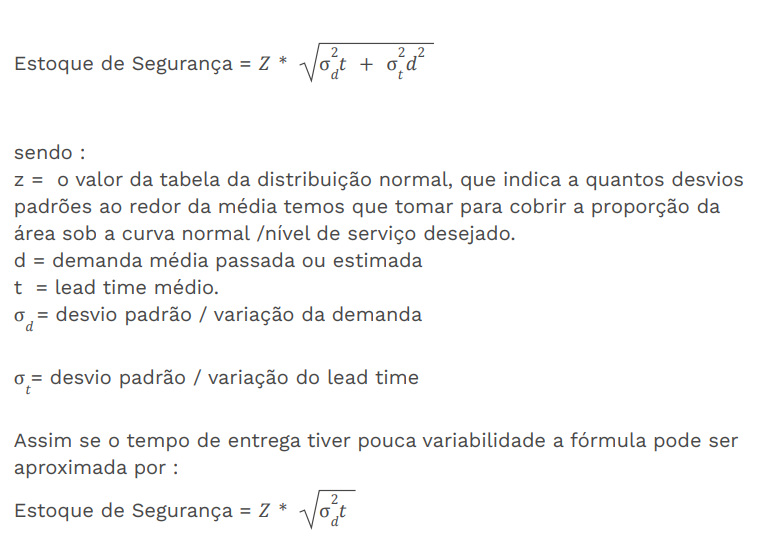

In [ ]:
estoque['data'] = estoque['data'].astype('datetime64')       ## transforma a coluna data no tipo datetime

In [ ]:
estoque['Ano'] = estoque['data'].dt.year                     ## acrescenta uma nova coluna mostrando somente o ano

In [ ]:
estoque['mediaDiaria'] = estoque['vendas-iogurte'] / 7        ## acrescenta uma nova coluna mostrando a media diaria, já que os valores, até então apresentados,
estoque                                                       ## equivalem a periodos de 7 dias

,data,vendas-iogurte,lead-time,Ano,mediaDiaria
0,2015-01-04,5083,4,2015,726.142857
1,2015-01-11,4936,3,2015,705.142857
2,2015-01-18,5051,6,2015,721.571429
3,2015-01-25,4846,4,2015,692.285714
4,2015-02-01,5003,5,2015,714.714286
...,...,...,...,...,...
365,2022-01-02,5120,5,2022,731.428571
366,2022-01-09,4968,3,2022,709.714286
367,2022-01-16,5095,6,2022,727.857143
368,2022-01-23,4941,6,2022,705.857143


In [ ]:
t = estoque.groupby(['Ano'])['lead-time'].mean()    ## foi calculado a média, das médias anuais do lead time, de forma a obter o t
t = t.mean()
t

5.152648766328012

In [ ]:
d = estoque.groupby(['Ano'])['mediaDiaria'].mean()    ## foi calculado a média, das medias anuais da demanda, de forma a obter o d
d = d.mean()
d

714.6480587808418

In [ ]:
desvio_padrao_demanda = estoque.groupby(['Ano'])['mediaDiaria'].std()     ## desvio padrao da demanda (diária), agrupado por ano, seguido da média entre esses valores anuais
desvio_padrao_demanda = desvio_padrao_demanda.mean()
desvio_padrao_demanda

10.966348034975876

In [ ]:
desvio_padrao_leadtime = estoque.groupby(['Ano'])['lead-time'].std()            ## desvio padrao do lead time, agrupado por ano, seguido da média entre esses valores anuais
desvio_padrao_leadtime = desvio_padrao_leadtime.mean()
desvio_padrao_leadtime

1.5967342249596541

In [ ]:
## o valor 0.9987, passado como parâmetro, foi passado na questão e representa o nível de confiabilidade
z = norm.ppf(0.9987)
z

3.011453758499792

In [ ]:

estoque_de_seguranca = z * (math.sqrt(((desvio_padrao_demanda**2)*t)+((desvio_padrao_leadtime**2)*(d**2))))       ## fórmula para calcular o estoque de segurança, passado na questão
estoque_de_seguranca = int(estoque_de_seguranca.round())                                                          ## valor arredondado
print('ESTOQUE DE SEGURANÇA = ', estoque_de_seguranca)

ESTOQUE DE SEGURANÇA =  3437
